<a href="https://colab.research.google.com/github/nitajadav8/LLM-Usecases/blob/main/mistral_eda_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Natural Language EDA with Mistral-7B-Instruct (Colab Version)

In [ ]:
!pip install -q pandas matplotlib streamlit


## 📁 Upload CSV File

In [ ]:
# from google.colab import files
import pandas as pd

# uploaded = files.upload()
# filename = list(uploaded.keys())[0]
# df = pd.read_csv(filename)
# df.head()
df = pd.read_csv('/content/delhi_air_quality_feature_store_processed.csv', quotechar='"', doublequote=True, engine='python')
df.head()

,location_id,city,event_timestamp,temperature,humidity,pressure,wind_speed,wind_direction,pm25,pm10,no2,so2,o3,co,aqi
0,"Delhi Institute of Tool Engineering, Wazirpur,...",Wazirpur,2000-03-15 13:44:28.651396,30.450,74.100,990.425,0.300,21.7,252.0,332.0,62.4,4.8,22.4,35.7,332.0
1,"Satyawati College, Delhi, Delhi, India",Delhi,2000-03-15 13:44:28.651396,26.675,74.350,980.650,1.375,55.3,256.0,234.0,59.2,11.9,2.1,33.8,256.0
2,"ITI Shahdra, Jhilmil Industrial Area, Delhi, D...",Jhilmil,2000-03-15 13:44:28.651396,28.775,62.925,984.350,0.300,221.3,265.0,210.0,48.3,5.1,8.2,35.1,265.0
3,"Sonia Vihar Water Treatment Plant DJB, Delhi, ...",Sonia Vihar,2000-03-15 13:44:28.651396,26.575,78.525,991.300,0.300,313.6,251.0,177.0,16.5,1.8,1.7,24.9,251.0
4,"PGDAV College, Sriniwaspuri, Delhi, Delhi, India",Sriniwaspuri,2000-03-15 13:44:28.651396,22.300,71.425,985.650,0.300,347.1,282.0,347.0,43.1,5.2,3.4,29.9,347.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## 📦 Load LLMs


In [ ]:
!pip install -U langchain langchain-community transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 114.2 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.54.0
    Uninstalling transformers-4.54.0:
      Successfully uninstalled transformers-4.54.0


In [ ]:
!pip install langchain-community
!pip install langchain_experimental

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline
from langchain.llms import HuggingFacePipeline
from langchain_experimental.agents import create_pandas_dataframe_agent

# model_id = "google/flan-t5-base"
# tokenizer = AutoTokenizer.from_pretrained(model_id)
# model = AutoModelForSeq2SeqLM.from_pretrained(model_id)

# pipe = pipeline(
#     "text2text-generation",
#     model=model,
#     tokenizer=tokenizer,
#     max_new_tokens=512,
#     temperature=0.5,
#     do_sample=True,
#     device=-1
# )

# Use the already loaded Falcon-7b-instruct model
llm = HuggingFacePipeline(pipeline=model)

# Changed from create_pandas_dataframe_agent to create_csv_agent and use file path
# Removed deprecated parameters: handle_parsing_errors, handle_valid_response, allow_dangerous_code
agent = create_pandas_dataframe_agent(
    llm,
    df,
    verbose=True,
    allow_dangerous_code=True,
    handle_parsing_errors=True # Add this to handle parsing errors
)

/usr/local/lib/python3.11/dist-packages/langchain_experimental/agents/agent_toolkits/pandas/base.py:283: UserWarning: Received additional kwargs {'handle_parsing_errors': True} which are no longer supported.
  warnings.warn(


## 🧠 Ask EDA Questions

In [ ]:
question = input("Ask a question about your dataset: ")
response = agent.run(question)
print("\nAnswer:\n", response)

Ask a question about your dataset: Plot a histogram of PM2.5 values.


> Entering new AgentExecutor chain...


ValueError: An output parsing error occurred. In order to pass this error back to the agent and have it try again, pass `handle_parsing_errors=True` to the AgentExecutor. This is the error: Could not parse LLM output: `python_repl_ast = open("input.`
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/OUTPUT_PARSING_FAILURE 

In [ ]:
#load open source LLM
from transformers import pipeline
model = pipeline("text-generation", model="tiiuae/falcon-7b-instruct") #lamma 3.1, 3.2 3bn


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Device set to use cuda:0


In [ ]:
prompt = """
You are a Python data scientist.
Load a CSV file called 'delhi_air_quality_feature_store_processed.csv' and:
1. Convert the 'event_timestamp' to datetime
2. Print missing values by column
3. Create new features: year, month, hour
4. Show the correlation matrix for ['pm25', 'pm10', 'temperature', 'humidity', 'co']
5. Generate a seaborn heatmap for it.
"""
response = model(prompt)
print(response)

Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


[{'generated_text': '\nYou are a Python data scientist.\nLoad a CSV file called \'delhi_air_quality_feature_store_processed.csv\' and:\n1. Convert the \'event_timestamp\' to datetime\n2. Print missing values by column\n3. Create new features: year, month, hour\n4. Show the correlation matrix for [\'pm25\', \'pm10\', \'temperature\', \'humidity\', \'co\']\n5. Generate a seaborn heatmap for it.\n\nAnswer:\n\n```\nimport pandas as pd\nfrom datetime import datetime, time\nfrom seaborn import heatmap\n\n# Load data\ndf = pd.read_csv(\'delhi_air_quality_feature_store_processed.csv\')\n\n# Convert \'event_timestamp\' to datetime\ndf[\'event_timestamp\'] = pd.to_datetime(df[\'event_timestamp\'])\n\n# Print missing values by column\ndf[\'event_timestamp\'].fillna(pd.to_datetime(0), inplace=True)\n\n# Create new features\ndf[\'year\'] = pd.to_datetime(df[\'event_timestamp\'], format=\'%Y\')\ndf[\'month\'] = pd.to_datetime(df[\'event_timestamp\'], format=\'%m\')\ndf[\'hour\'] = pd.to_datetime(df[

In [ ]:
df = pd.read_csv('/content/delhi_air_quality_feature_store_processed.csv')
df['event_timestamp'] = pd.to_datetime(df['event_timestamp'])
# Print missing values by column\ndf[\'event_timestamp\'].fillna(pd.to_datetime(0), inplace=True)\n\n# Create new features\ndf[\'year\'] = pd.to_datetime(df[\'event_timestamp\'], format=\'%Y\')\ndf[\'month\'] = pd.to_datetime(df[\'event_timestamp\'], format=\'%m\')\ndf[\'hour\'] = pd.to_datetime(df[\'event_timestamp\'], format=\'%H\')\n\n# Show correlation matrix\ncorr = df.corr()\nprint(corr)\n\n# Generate heatmap\nheatmap(df, cmap=\'Blues\', edgecolor=\'white\', annot=True)\n```\n\nOutput:\n\n```\n<p><img src="'}]

In [ ]:
df['event_timestamp']

,event_timestamp
0,2000-03-15 13:44:28.651396
1,2000-03-15 13:44:28.651396
2,2000-03-15 13:44:28.651396
3,2000-03-15 13:44:28.651396
4,2000-03-15 13:44:28.651396
...,...
2921408,2024-11-05 13:44:28.651396
2921409,2024-11-05 13:44:28.651396
2921410,2024-11-05 13:44:28.651396
2921411,2024-11-05 13:44:28.651396


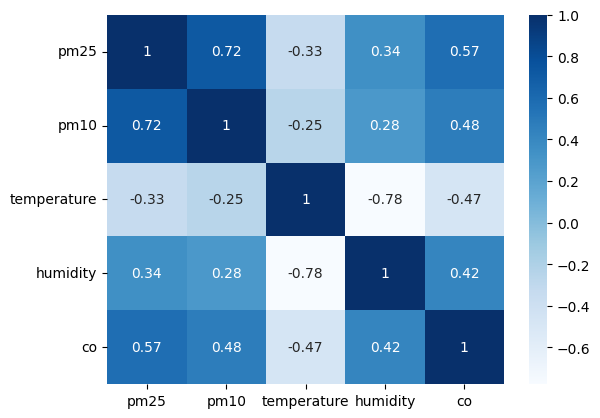

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the specified columns
corr = df[['pm25', 'pm10', 'temperature', 'humidity', 'co']].corr()

# Generate a seaborn heatmap for the correlation matrix
sns.heatmap(corr, cmap='Blues', edgecolor='white', annot=True)
plt.show()

In [ ]:
# Revert to using Flan-T5 Base due to OutOfMemoryError with Falcon-7b-instruct
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline
import torch

# Load the Flan-T5 Base model
model_id = "google/flan-t5-base"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForSeq2SeqLM.from_pretrained(model_id)

# Check for GPU and move model accordingly, otherwise load on CPU
device = 0 if torch.cuda.is_available() else -1
model.to(device)

pipe = pipeline(
    "text2text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=512,
    temperature=0.5,
    do_sample=True,
    device=device # Use the determined device
)

Device set to use cpu


In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline
from langchain.llms import HuggingFacePipeline
from langchain_experimental.agents import create_pandas_dataframe_agent

# Use the Flan-T5 Base pipeline created in the previous cell
llm = HuggingFacePipeline(pipeline=pipe)

agent = create_pandas_dataframe_agent(
    llm,
    df,
    verbose=True,
    allow_dangerous_code=True,
    handle_parsing_errors=True # Keep this to handle parsing errors
)

/usr/local/lib/python3.11/dist-packages/langchain_experimental/agents/agent_toolkits/pandas/base.py:283: UserWarning: Received additional kwargs {'handle_parsing_errors': True} which are no longer supported.
  warnings.warn(


In [ ]:
# Get the code from cell 5bea4b87 and execute it
# This is a workaround for the issue with get_ipython().run_cell_id()
# The code in cell 5bea4b87 is:
# question = input("Ask a question about your dataset: ")
# response = agent.run(question)
# print("\nAnswer:\n", response)

question = input("Ask a question about your dataset: ")
response = agent.run(question)
print("\nAnswer:\n", response)

Ask a question about your dataset: Plot a histogram of PM2.5 values.


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.




> Entering new AgentExecutor chain...


/usr/local/lib/python3.11/dist-packages/transformers/generation/utils.py:2505: UserWarning: You are calling .generate() with the `input_ids` being on a device type different than your model's device. `input_ids` is on cpu, whereas the model is on cuda. You may experience unexpected behaviors or slower generation. Please make sure that you have put `input_ids` to the correct device by calling for example input_ids = input_ids.to('cuda') before running `.generate()`.
  warnings.warn(
Exception in thread Thread-12 (generate):
Traceback (most recent call last):
  File "/usr/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.11/threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/_contextlib.py", line 116, in decorate_context
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/transformers/generat

Empty: 